# Support Vector Machines and Dimensionality Reduction with Clothing Item Classification

In this experiment, we will benchmark SVM classifiers on the Fashion MNIST dataset. The aim is to investigate the impact of reducing the dimensionality of the data on both the training time and the resulting performance.

The ten fashion class labels include:
1. T-shirt/top
2. Trouser/pants
3. Pullover shirt
4. Dress
5. Coat
6. Sandal
7. Shirt
8. Sneaker
9. Bag
10. Ankle boot

A detailed description of the Fashion MNIST dataset can be found here: https://github.com/zalandoresearch/fashion-mnist

*1) First, start by downloading the Fashion MNIST dataset. Print the shapes of the training and testing sets.*

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(xtrain, ytrain), (xtest, ytest) = fashion_mnist.load_data()
print(" shape training set: ",xtrain.shape)
print("shape training labels: ",ytrain.shape)
print("shape ytrain",xtest.shape)
print("shape ytest",ytest.shape)


 shape training set:  (60000, 28, 28)
shape training labels:  (60000,)
shape ytrain (10000, 28, 28)
shape ytest (10000,)


*2) Look at some samples from the data.*

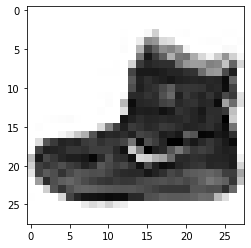

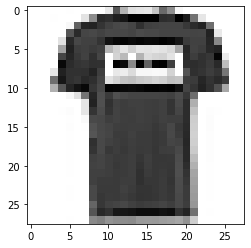

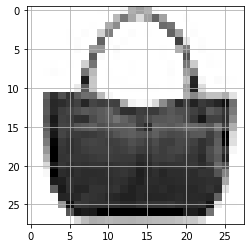

In [ ]:
plt.figure();
plt.imshow(xtrain[0],cmap="Greys")
plt.figure();
plt.imshow(xtrain[1],cmap="Greys")
plt.figure();
plt.imshow(xtrain[100],cmap="Greys")
plt.grid(True)

*3) Prepare the data for training: scale and flatten the images.*

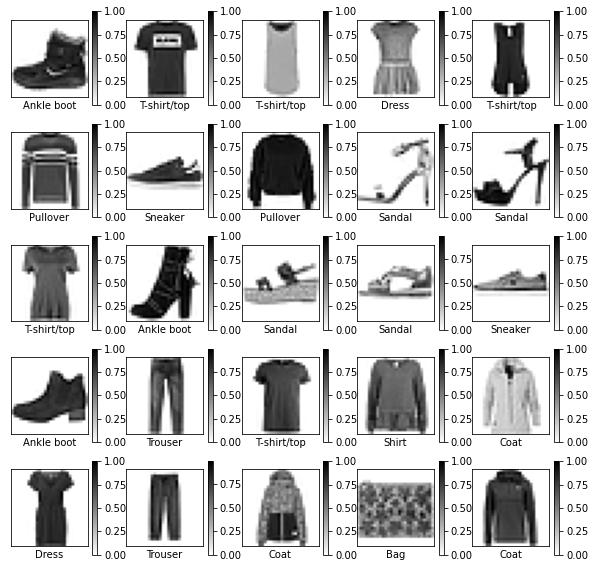

In [ ]:
xtrain = xtrain/255.0
xtest = xtest/255.0
Categories = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
#xtrain=xtrain.flatten()
#xtest=xtest.flatten()
#print(xtrain.shape)
#print(xtrain)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(xtrain[i], cmap=plt.cm.binary)
    plt.colorbar()
    plt.grid(False)
    plt.xlabel(Categories[ytrain[i]])


nsamples, nx, ny = xtrain.shape
xtrain2 = xtrain.reshape((nsamples,nx*ny))

nsamples, nx, ny = xtest.shape
xtest2 = xtest.reshape((nsamples,nx*ny))
   


Demo: measuring the time a block of code takes to run.

In [77]:
from time import time, sleep

t0 = time()
sleep(10)
print(f'Time to run: {(time() - t0):.2f} seconds')

Time to run: 10.01 seconds
Time to run: 10.01 seconds


*4) Train a support vector machine classifier on the data. Measure the time it takes to finish training.*

*Use the following hyperparameters:*
- *Regularization parameter: C = 3.5*
- *Kernel: radial basis function*
- *Kernel coefficient: gamma = 0.01*

In [78]:
from sklearn.svm import SVC

svm = SVC(C=3.5,gamma=0.01)
t0 = time()

svm.fit(xtrain2, ytrain)
print(f'Time to train: {(time() - t0):.2f} seconds')

#your code here

Time to run: 695.51 seconds


*5) The official evaluation metric for Fashion MNIST is accuracy as the classes are evenly distributed. Compute the accuracy on the test set. Also, keep track of the time required to test as above.*

In [91]:
nsamples, nx, ny = xtest.shape
xtest2 = xtest.reshape((nsamples,nx*ny))
t0 = time()
print('score', svm.score(xtest2,ytest))
print(f'Time to test: {(time() - t0):.2f} seconds')


score 0.8938
Time to test: 253.07 seconds


Since training our SVM on the full data takes a lot of time, let's explore the effect of dimensionality reduction using PCA.

*6) Create a reduced dataset using PCA. Do this for both the training and testing sets. Print the shape of the resulting datasets.*

*Take only the first 25 principal components.*

In [82]:
from sklearn.decomposition import PCA
pca = PCA(n_components=25)
X_pca = pca.fit(xtrain2)
X_pca=pca.transform(xtrain2)
Xtest_pca = pca.transform(xtest2)

#your code here

7) Repeat the same experiment you did in parts (4) and (5) using the reduced dataset.

In [89]:
#pca2 = PCA(n_components=25)

svm2 = SVC(C=3.5,gamma=0.01)
t0 = time()
svm2.fit(X_pca, ytrain)
print(f'Time to train: {(time() - t0):.2f} seconds')


t1 = time()
print('testing score', svm2.score(Xtest_pca, ytest))
print(f'Time to test: {(time() - t1):.2f} seconds')


#your code here

Time to train: 46.74 seconds
testing score 0.8632
Time to test: 13.60 seconds


*8) Compare the two approaches in terms of time and accuracy.*

The PCA approach takes much less time to train (47vs695) and test (13 vs 253) but is naturally less accurate due to less components (86% accuracy vs 89% 